### Exercício 01 - Subespaço

Considere, em $\mathbb{R}^3$, o plano dado pela equação $x+y-z=0$.
Os vetores $u=[1, 0, 1]^\top$ e $v=[0, 1, 1]^\top$ pertencem a tal plano (como verificar esta afirmação?). Qualquer combinação linear $w=au + bv$, com $a,b\in \mathbb{R}$, pertence ao plano, pois

$$
w = \begin{bmatrix} a \\ b \\ a+b \end{bmatrix}.
$$

Logo o plano corresponde a um subespaço de $\mathbb{R}^3$.
- Implemente uma visualização desse subespaço com os vetores $u$ e $v$ e uma combinação linear qualquer desses vetores.

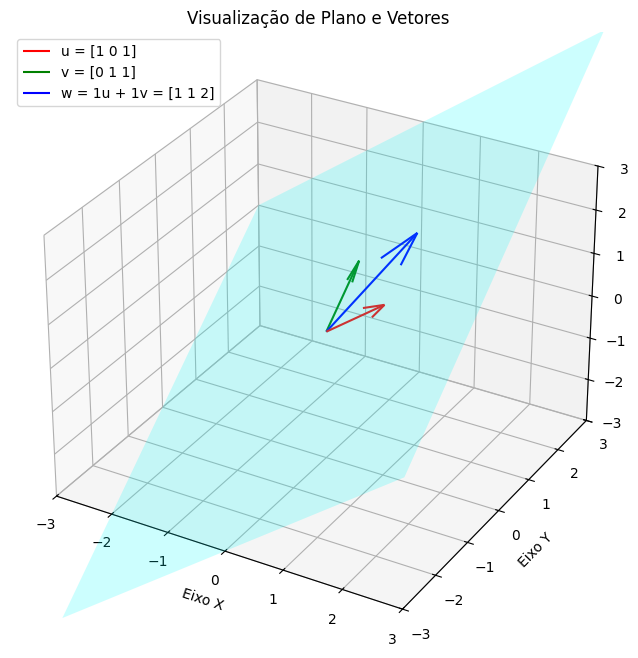

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

# vetores
u = np.array([1, 0, 1])
v = np.array([0, 1, 1])

# escalares (mantive 1 para simplicidade)
a = 1
b = 1
w = a*u + b*v

# definições do gráfico
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plotando o plano
x_range = np.arange(-3, 4, 1)
y_range = np.arange(-3, 4, 1)
X, Y = np.meshgrid(x_range, y_range)
# calcula o valor de z para cada ponto x, y
Z = X + Y
# plota a superfície do plano (com transparência)
ax.plot_surface(X, Y, Z, alpha=0.2, color='cyan', rstride=100, cstride=100)

# origem dos vetores
origin = np.array([0, 0, 0])

# 'quiver' desenha as setas dos vetores (também cria legendas)
ax.quiver(*origin, *u, color='r', label=f'u = {u}')
ax.quiver(*origin, *v, color='g', label=f'v = {v}')
ax.quiver(*origin, *w, color='b', label=f'w = {a}u + {b}v = {w}')

# configurações do plano no gráfico
plane_proxy = mpatches.Patch(color='cyan', alpha=0.2, label='Plano x+y-z=0')

# adiciona legendas ao gráfico
ax.legend()
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
ax.set_title('Visualização de Plano e Vetores')

# Ajustando os limites dos eixos para melhor visualização
max_val = np.max(np.abs(np.vstack([u, v, w]))) + 1
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_zlim([-max_val, max_val])

# linhas de grade
ax.grid(True)

# garante que a legenda seja exibida corretamente
ax.legend()

# salva a figura em um arquivo
plt.savefig('vetores_e_plano_3d.png', dpi=300)

### Exercício 02 - Mudança de base
Considere a base $B$ de $\mathbb{R}^3$ formada pelos vetores $(1,0,1)$, $(1,1,1)$ e $(1,1,2)$. Considere também a base $C$ formada pelos vetores $(1,0,0)$, $(0,1,0)$ e $(0,0,1)$.
- Calcule $M_B^C$ e $M_C^B$
- Generalize o cálculo da matriz de mudança de base em uma função.
- Sejam as coordenadas do vetor $v$ em relação a base $C$ dadas por $v_C = [8, 7, 1]^\top$. Calcule as coordenadas do vetor $v$ em relação a base $B$.

In [2]:
import numpy as np


# mudança de base entre B e C ---------------------------------------------------------------
# definição dos vetores da base B
b1 = np.array([1, 0, 1])
b2 = np.array([1, 1, 1])
b3 = np.array([1, 1, 2])

# matriz de mudança de base de B para C (M_B^C) tem os vetores de B como colunas.
M_B_C = np.array([b1, b2, b3]).T

# matriz de mudança de base de C para B (M_C^B) é a inversa de M_B_C.
M_C_B = np.linalg.inv(M_B_C)

print("--- matrizes de mudança de base ---")
print("matriz de B para C (M_B^C):")
print(M_B_C.astype(float))
print("\nmatriz de C para B (M_C^B):")
print(M_C_B)
print("-----------------------------------")


# generalização de função para mudança de base ----------------------------------------------
def matriz_mudanca_base(base_de, base_para):
    P_de = np.array(base_de).T # matriz com os vetores da "base de" como colunas
    P_para = np.array(base_para).T # matriz com os vetores da "base para" como colunas
    P_para_inv = np.linalg.inv(P_para) # inversa da matriz da base para
    return P_para_inv @ P_de # produto matricial

# definição da base C (canônica)
c1 = np.array([1, 0, 0])
c2 = np.array([0, 1, 0])
c3 = np.array([0, 0, 1])
base_B = [b1, b2, b3]
base_C = [c1, c2, c3]

# testando a função para recriar M_C^B
M_C_B_func = matriz_mudanca_base(base_de=base_C, base_para=base_B)

print("\n--- teste da função generalizada ---")
print("matriz de C para B (calculada pela função):")
print(M_C_B_func)
print("-----------------------------------")


# cálculo das coordenadas de v na base B ----------------------------------------------------
# coordenadas do vetor v na base C
v_C = np.array([8, 7, 1])

# para encontrar as coordenadas de v na base B (v_B), multiplicamos M_C_B por v_C
v_B = M_C_B @ v_C

print("\n--- cálculo das coordenadas ---")
print(f"coordenadas de v na base C (v_C): {v_C}")
print(f"coordenadas de v na base B (v_B): {np.round(v_B).astype(int)}") # arredonda para inteiros
print("-----------------------------------")

# verificação (extra): se transformarmos v_B de volta para a base C, devemos obter o v_C original
v_C_verificacao = M_B_C @ v_B
print(f"\nverificação (convertendo v_B de volta para C): {np.round(v_C_verificacao).astype(int)}")

--- matrizes de mudança de base ---
matriz de B para C (M_B^C):
[[1. 1. 1.]
 [0. 1. 1.]
 [1. 1. 2.]]

matriz de C para B (M_C^B):
[[ 1. -1.  0.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]
-----------------------------------

--- teste da função generalizada ---
matriz de C para B (calculada pela função):
[[ 1. -1.  0.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]
-----------------------------------

--- cálculo das coordenadas ---
coordenadas de v na base C (v_C): [8 7 1]
coordenadas de v na base B (v_B): [ 1 14 -7]
-----------------------------------

verificação (convertendo v_B de volta para C): [8 7 1]
